In [1]:
from __future__ import print_function
import tensorflow.keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.optimizers import RMSprop

import os

import numpy as np
import matplotlib.pyplot as plt

In [2]:
batch_size = 32
num_classes = 10
epochs = 100
#data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
print(x_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

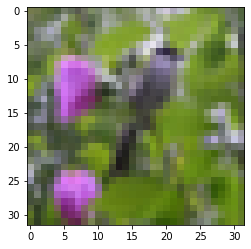

In [7]:
plt.imshow(x_train[300],interpolation='nearest')
y_train[300]

In [8]:
x_train.shape[1:]

(32, 32, 3)

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = RMSprop(lr=0.0001)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [11]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
10016/50000 [=====>........................] - ETA: 3:00 - loss: 2.1701 - acc: 0.1877

KeyboardInterrupt: 

In [14]:
model2 = Sequential()
#model.add(Conv2D(32, (3, 3), padding='same',
#                 input_shape=x_train.shape[1:]))
#model.add(Activation('relu'))
#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#model.add(Conv2D(64, (3, 3), padding='same'))
#model.add(Activation('relu'))
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(100))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [15]:
model2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 12s 234us/sample - loss: 2.0717 - acc: 0.2394 - val_loss: 1.8950 - val_acc: 0.3248
Epoch 2/100
50000/50000 [==============================] - 13s 268us/sample - loss: 1.9297 - acc: 0.3037 - val_loss: 1.8026 - val_acc: 0.3726
Epoch 3/100
50000/50000 [==============================] - 13s 258us/sample - loss: 1.8752 - acc: 0.3305 - val_loss: 1.7539 - val_acc: 0.3953
Epoch 4/100
50000/50000 [==============================] - 14s 283us/sample - loss: 1.8408 - acc: 0.3429 - val_loss: 1.7047 - val_acc: 0.4030
Epoch 5/100
50000/50000 [==============================] - 11s 225us/sample - loss: 1.8182 - acc: 0.3507 - val_loss: 1.7164 - val_acc: 0.4019
Epoch 6/100
50000/50000 [==============================] - 11s 224us/sample - loss: 1.7982 - acc: 0.3624 - val_loss: 1.6676 - val_acc: 0.4147
Epoch 7/100
50000/50000 [==============================] - 12s 242us/sample - loss: 1.7798 - acc: 

50000/50000 [==============================] - 11s 222us/sample - loss: 1.5784 - acc: 0.4372 - val_loss: 1.5130 - val_acc: 0.4717
Epoch 59/100
50000/50000 [==============================] - 11s 222us/sample - loss: 1.5765 - acc: 0.4395 - val_loss: 1.5168 - val_acc: 0.4669
Epoch 60/100
50000/50000 [==============================] - 11s 222us/sample - loss: 1.5739 - acc: 0.4390 - val_loss: 1.5046 - val_acc: 0.4679
Epoch 61/100
50000/50000 [==============================] - 11s 221us/sample - loss: 1.5795 - acc: 0.4388 - val_loss: 1.5025 - val_acc: 0.4651
Epoch 62/100
50000/50000 [==============================] - 11s 223us/sample - loss: 1.5785 - acc: 0.4391 - val_loss: 1.4813 - val_acc: 0.4774
Epoch 63/100
50000/50000 [==============================] - 12s 232us/sample - loss: 1.5719 - acc: 0.4416 - val_loss: 1.4867 - val_acc: 0.4766
Epoch 64/100
50000/50000 [==============================] - 11s 221us/sample - loss: 1.5719 - acc: 0.4411 - val_loss: 1.5195 - val_acc: 0.4679
Epoch 65/100

In [19]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  307300    
_________________________________________________________________
activation_8 (Activation)    multiple                  0         
_________________________________________________________________
dropout_4 (Dropout)          multiple                  0         
_________________________________________________________________
dense_5 (Dense)              multiple                  1010      
_________________________________________________________________
activation_9 (Activation)    multiple                  0         
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
________________________________________________

In [21]:
model2_name = 'keras_cifar10_trained_model.h5'
save_dir = os.path.join(os.getcwd(), 'keras_cifar10_trained_model.h5')
model2.save(save_dir)